In [1]:
# Importing requird python packages
# Path to hsmpy package
HSMPY_PATH = r'C:\Users\MR068144\Downloads\Python Scripts'
import sys, os, arcpy, csv, json, math
sys.path.append(HSMPY_PATH)
import hsmpy3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML 
import subprocess 
import webbrowser
import time
import copy
import shutil
from lxml import html
import requests

from time import gmtime, strftime
from ipywidgets import FloatProgress
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-08-20 14:33:51


In [5]:
hsmpy3.common.CON_CMFClearingHousetoExcel(
    HSMPY_PATH,
    r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO8\Rumble_Strips\3.Evaluation\8.CMFClearinghouseData',
    'CMFClearinghouseSnapshot08152018.xlsx'
)

In [2]:
C_DF = pd.read_excel(r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO8\Rumble_Strips\3.Evaluation\8.CMFClearinghouseData\CMFClearinghouseSnapshot08152018.xlsx')
C_DF.shape

(7545, 40)

In [3]:
for i in C_DF.index:
    try:
        cv = C_DF.UnAdjCMFSE[i] / C_DF.CMF[i]
    except:
        cv = 0
    C_DF.loc[i,'CV'] = cv

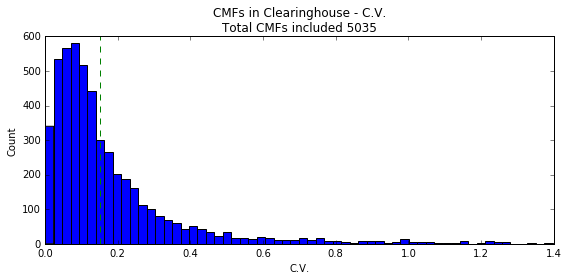

In [90]:
plt.figure(figsize=(8,4))
X = [cv for cv in C_DF.CV if cv>0 and cv<1.4]
plt.hist(X,bins = 60)
plt.vlines(0.15,0,600,linestyles='--',colors='green')
plt.xlabel('C.V.')
plt.ylabel('Count')
plt.title('CMFs in Clearinghouse - C.V.\nTotal CMFs included {}'.format(len(X)))
plt.tight_layout()
plt.savefig('CMF_CV_Hist.png')
plt.show()

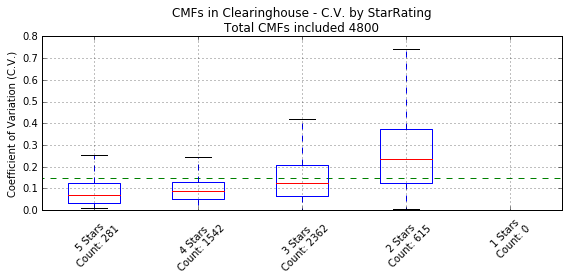

In [91]:
plt.figure(figsize=(8,4))
L = ['5 Stars','4 Stars','3 Stars','2 Stars','1 Stars']
X = [C_DF[(C_DF.StarRating==l) & (C_DF.CV>0) & (~C_DF.CV.isnull())]['CV'] for l in L]
plt.boxplot(x=X,positions=range(1,len(L)+1),showfliers =False,labels=['{}\nCount: {}'.format(l,len(x)) for x,l in zip(X,L)])
#plt.gca().set_xlim([0,len(list(Agg_DF.index))])
plt.xticks(rotation=45)
#plt.hlines(1,0,len(list(Agg_DF.index)))
plt.ylabel('Coefficient of Variation (C.V.)')
plt.grid()
plt.title('CMFs in Clearinghouse - C.V. by StarRating\nTotal CMFs included {}'.format(sum([len(x) for x in X])))
plt.hlines(0.15,0,6,linestyles='--',colors='green')
plt.tight_layout()
plt.savefig('CMF_CV.png')
plt.show()

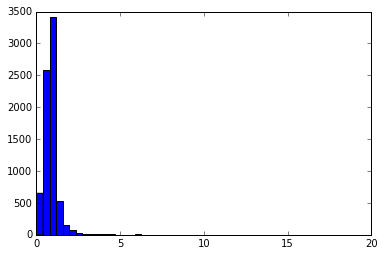

In [7]:
plt.hist(list(C_DF.CMF),bins=50)
plt.show()

In [66]:
C_DF.Category.value_counts()

Roadway                         1430
Shoulder treatments             1306
Intersection traffic control    1007
Intersection geometry            825
Roadside                         593
Access management                490
Advanced technology and ITS      456
Delineation                      300
Speed management                 217
Signs                            206
Bicyclists                       173
Highway lighting                 104
Interchange design                98
Pedestrians                       89
Alignment                         88
Work zone                         84
On-street parking                 33
Transit                           32
Railroad grade crossings          14
Name: Category, dtype: int64

In [77]:
C_DF[C_DF.StarRating.isin(['5 Stars','4 Stars'])].Methodology.value_counts(True)

Before/after using empirical Bayes or full Bayes    0.822556
Regression cross-section                            0.080186
Meta-analysis                                       0.042938
Simple before/after                                 0.036730
Other before/after                                  0.009312
Before/after using comparison group                 0.007243
Non-regression cross-section                        0.000517
Time series                                         0.000517
Name: Methodology, dtype: float64

In [75]:
C_DF.StarRating.value_counts(True)

3 Stars    0.484660
4 Stars    0.254633
2 Stars    0.166952
5 Stars    0.046410
1 Star     0.041115
0 Stars    0.006230
Name: StarRating, dtype: float64

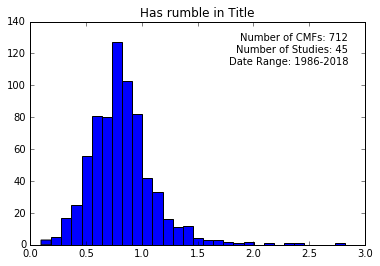

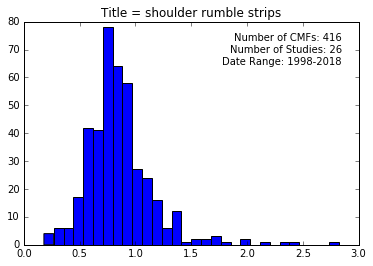

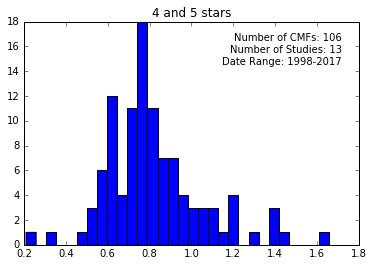

{'NCHRP Report 641: Guidance for the Design and Application of Shoulder and Centerline Rumble Strips', 'Potential Crash Reduction Benefits of Shoulder Rumble Strips in Two-Lane Rural Highways', 'Development of Crash Modification Factors of Alignment Elements and Safety Countermeasures for Korean Freeways', 'NCHRP Report 794: Median Cross-Section Design for Rural Divided Highways', 'Safety Performance of Shoulder Rumble Stripes on Rural Roadways', 'Estimating the Safety Benefits of Shoulder Rumble Strips on Two Lane Rural Highways in Minnesota: An Empirical Bayes Observational Before-After Study', "Benefit/Cost Evaluation of MoDOT's Total Striping and Delineation Program: Phase II", 'The Effectiveness and Use of Continuous Shoulder Rumble Strips', 'Validation and Application of Highway Safety Manual (Part D) in Florida', 'Exploration and comparison of crash modification factors for multiple treatments on rural multilane roadways', 'Impact of Rumble Strips on Collision Reduction on BC Hi

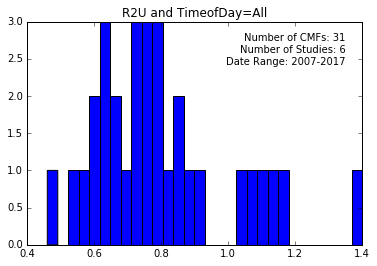

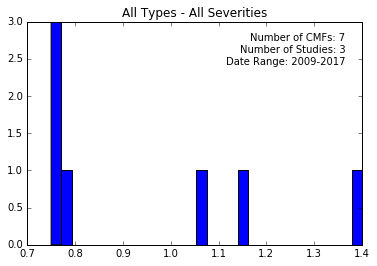

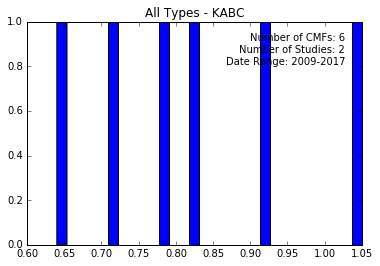

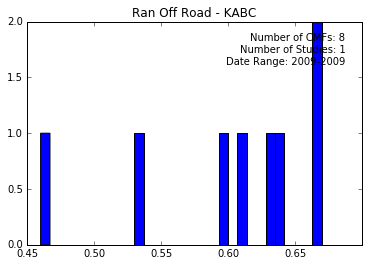

In [4]:
def PlotCMFHist(S_DF,Title):
    left, width = .1, .85
    bottom, height = .1, .85
    right = left + width
    top = bottom + height  
    plt.hist(list(S_DF["CMF"]),bins=30)
    plt.title(Title)
    plt.gca().text(right, top,'Number of CMFs: {}\nNumber of Studies: {}\nDate Range: {}-{}'.format(len(S_DF),len(set(S_DF.StudyID)),min(S_DF.Date),max(S_DF.Date)) ,horizontalalignment='right',verticalalignment='top',transform=plt.gca().transAxes)
    plt.show()

R_DF = C_DF[C_DF.Category=='Shoulder treatments']
    
R_DF = C_DF[[s.lower().find('rumble')>0 for s in C_DF.Title]]
PlotCMFHist(
    R_DF,
    'Has rumble in Title'
)
L = [
    'Install shoulder rumble strips',
    'Install shoulder rumble stripe, widen shoulder from 0 to 2 feet, and pavement resurfacing',
    'Install a combination of shoulder rumble stripes, shoulder widening (from 0 to 2 ft) and resurface pavement',
    'Install edgeline rumble strips at horizontal curve',
    'Install edgeline rumble strips',
    'Install shoulder rumble strips on roadways with a shoulder width equal to 5 feet',
    'Install shoulder rumble strips and widen shoulder width',
    'Install shoulder rumble strips and widen shoulder',
    'Install shoulder rumble strips with an offset of 0-8 inches relative to the edgeline',
    'Install continuous milled-in shoulder rumble strips',
    'Install wider markings and shoulder rumble strips with resurfacing',
    'Install continuous, rolled-in shoulder rumble strips',
]
R_DF = R_DF[R_DF.Title.isin(L)]
PlotCMFHist(
    R_DF,
    'Title = shoulder rumble strips'
)
R_DF = R_DF[R_DF.StarRating.isin(['4 Stars','5 Stars'])]
PlotCMFHist(
    R_DF,
    '4 and 5 stars'
)
print(set(R_DF.Title_Study))

R_DF = R_DF[(R_DF.AreaType=='Rural') & (R_DF.TimeofDay=='All') & (R_DF.NumberofLanes=='2')]
PlotCMFHist(
    R_DF,
    'R2U and TimeofDay=All'
)


    
PlotCMFHist(
    R_DF[(R_DF.CrashType=='All') & (R_DF.CrashSeverity=='All')],
    'All Types - All Severities'
)
PlotCMFHist(
    R_DF[(R_DF.CrashType=='All') & (R_DF.CrashSeverity=='K (fatal),A (serious injury),B (minor injury),C (possible injury)')],
    'All Types - KABC'
)
PlotCMFHist(
    R_DF[(R_DF.CrashType=='Run off road') & (R_DF.CrashSeverity=='K (fatal),A (serious injury),B (minor injury),C (possible injury)')],
    'Ran Off Road - KABC'
)



In [6]:
c=R_DF[(R_DF.CrashType=='Run off road') & (R_DF.CrashSeverity=='K (fatal),A (serious injury),B (minor injury),C (possible injury)')]
display(HTML(c.to_html()))

,CMFID,StudyID,Title,Title_Study,Authur,Date,DataDateRange,AreaType,TimeofDay,CrashType,CrashSeverity,Country,State,Municipality,Methodology,CMF,StarRating,Category,InHSM,Comments,Abstract,RoadwayTypes,NumberofLanes,RoadDivisionType,SpeedLimit,AADT,IntType,IntGeometry,TrafficControl,AADTMajor,AADTMinor,Description,PreCondition,DateAdded,AdjCMFSE,UnAdjCMFSE,CRF,AdjCRFSE,UnAdjCRFSE,Citation,CV
3394,3394,206,Install edgeline rumble strips,NCHRP Report 641: Guidance for the Design and ...,Torbic et al.,2009,1997 to 2006,Rural,All,Run off road,"K (fatal),A (serious injury),B (minor injury),...",U.S.A.,"MN, MO, PA",NaN,Regression cross-section,0.67,4 Stars,Roadway,No,The authors collected data on thru lanes and s...,This NCHRP Report 641 provides guidance for th...,Not Specified,2,Undivided,NaN,Minimum of 180 to Maximum of 12776 Average Dai...,NaN,NaN,NaN,NaN,NaN,NaN,No Prior Condition(s),Mar-21-2011,NaN,0.1222,33 (This value indicates a decrease in crashes),NaN,12.22,"Torbic, D. J., Hutton, J. M., Bokenkroger, C. ...",0.182388
3396,3396,206,Install edgeline rumble strips,NCHRP Report 641: Guidance for the Design and ...,Torbic et al.,2009,1997 to 2006,Rural,All,Run off road,"K (fatal),A (serious injury),B (minor injury),...",U.S.A.,"MN, MO, PA",NaN,Regression cross-section,0.61,4 Stars,Roadway,No,The authors collected data on thru lanes and s...,This NCHRP Report 641 provides guidance for th...,Not Specified,2,Undivided,NaN,Minimum of 180 to Maximum of 12776 Average Dai...,NaN,NaN,NaN,NaN,NaN,NaN,No Prior Condition(s),Mar-21-2011,NaN,0.1556,39 (This value indicates a decrease in crashes),NaN,15.56,"Torbic, D. J., Hutton, J. M., Bokenkroger, C. ...",0.255082
3454,3454,206,Install shoulder rumble strips,NCHRP Report 641: Guidance for the Design and ...,Torbic et al.,2009,1997 to 2006,Rural,All,Run off road,"K (fatal),A (serious injury),B (minor injury),...",U.S.A.,"MN, MO, PA",NaN,Before/after using empirical Bayes or full Bayes,0.64,5 Stars,Shoulder treatments,No,The authors collected data on thru lanes and s...,This NCHRP Report 641 provides guidance for th...,Not Specified,2,Undivided,NaN,Minimum of 782 to Maximum of 10386 Average Dai...,NaN,NaN,NaN,NaN,NaN,NaN,No Prior Condition(s),Mar-21-2011,NaN,0.0971,36 (This value indicates a decrease in crashes),NaN,9.71,"Torbic, D. J., Hutton, J. M., Bokenkroger, C. ...",0.151719
3457,3457,206,Install shoulder rumble strips,NCHRP Report 641: Guidance for the Design and ...,Torbic et al.,2009,1997 to 2006,Rural,All,Run off road,"K (fatal),A (serious injury),B (minor injury),...",U.S.A.,PA,NaN,Before/after using empirical Bayes or full Bayes,0.63,4 Stars,Shoulder treatments,No,The authors collected data on thru lanes and s...,This NCHRP Report 641 provides guidance for th...,Not Specified,2,Undivided,NaN,Minimum of 948 to Maximum of 9067 Average Dail...,NaN,NaN,NaN,NaN,NaN,NaN,No Prior Condition(s),Mar-21-2011,NaN,0.1335,37 (This value indicates a decrease in crashes),NaN,13.35,"Torbic, D. J., Hutton, J. M., Bokenkroger, C. ...",0.211905
3550,3550,206,Install shoulder rumble strips,NCHRP Report 641: Guidance for the Design and ...,Torbic et al.,2009,1997 to 2006,Rural,All,Run off road,"K (fatal),A (serious injury),B (minor injury),...",U.S.A.,"MN, MO, PA",NaN,Regression cross-section,0.60,4 Stars,Shoulder treatments,No,The authors collected data on thru lanes and s...,This NCHRP Report 641 provides guidance for th...,Not Specified,2,Undivided,NaN,Minimum of 180 to Maximum of 12776 Average Dai...,NaN,NaN,NaN,NaN,NaN,NaN,No Prior Condition(s),Mar-21-2011,NaN,0.1265,40 (This value indicates a decrease in crashes),NaN,12.65,"Torbic, D. J., Hutton, J. M., Bokenkroger, C. ...",0.210833
3561,3561,206,Install shoulder rumble strips,NCHRP Report 641: Guidance for the Design and ...,Torbic et al.,2009,1997 to 2006,Rural,All,Run off road,"K (fatal),A (serious injury),B (minor injury),...",U.S.A.,"MN, MO, PA",NaN,Regression cross-section,0.53,4 Stars,Shoulder treatments,No,The authors collected data on 

In [13]:
R_DF = C_DF[[s.lower().find('rumble')>0 for s in C_DF.Title]]
R_DF.Title.value_counts()
L = [
    'Install shoulder rumble strips',
    'Install shoulder rumble stripe, widen shoulder from 0 to 2 feet, and pavement resurfacing',
    'Install a combination of shoulder rumble stripes, shoulder widening (from 0 to 2 ft) and resurface pavement',
    'Install edgeline rumble strips at horizontal curve',
    'Install edgeline rumble strips',
    'Install shoulder rumble strips on roadways with a shoulder width equal to 5 feet',
    'Install shoulder rumble strips and widen shoulder width',
    'Install shoulder rumble strips and widen shoulder',
    'Install shoulder rumble strips with an offset of 0-8 inches relative to the edgeline',
    'Install continuous milled-in shoulder rumble strips',
    'Install wider markings and shoulder rumble strips with resurfacing',
    'Install continuous, rolled-in shoulder rumble strips',
]

Install shoulder rumble strips                                                                                 309
Install centerline rumble strips                                                                                75
Install centerline and shoulder rumble strips                                                                   56
Install transverse rumble strips on stop controlled approaches in rural areas                                   35
Install shoulder rumble stripe, widen shoulder from 0 to 2 feet, and pavement resurfacing                       20
Install a combination of shoulder rumble stripes, shoulder widening (from 0 to 2 ft) and resurface pavement     20
Install centerline rumble strips on tangent sections                                                            14
Install centerline rumble strips on horizontal curves                                                           14
Install centerline rumble strips (horizontal curves)                            